https://machineboxio.com/docs/facebox/teaching-facebox -> followed this and posted the Lennon image which is wqhy it is recognised below

https://www.home-assistant.io/components/image_processing/

In [1]:
import requests
import operator
import os
import io
import base64
import pathlib
from PIL import Image
import json
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

#HEADERS = {'content-type': 'application/json'} ; # charset=utf-8
ENDPOINT = "localhost:8080"
URL = "http://{}/facebox/check".format(ENDPOINT)
print(URL)
IMG_FILE = "thebeatles.jpg"
FIG_SIZE = (18, 12)

def print_json(json_data):
    PrettyPrinter().pprint(json_data)

3.6.3 |Anaconda custom (64-bit)| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
http://localhost:8080/facebox/check


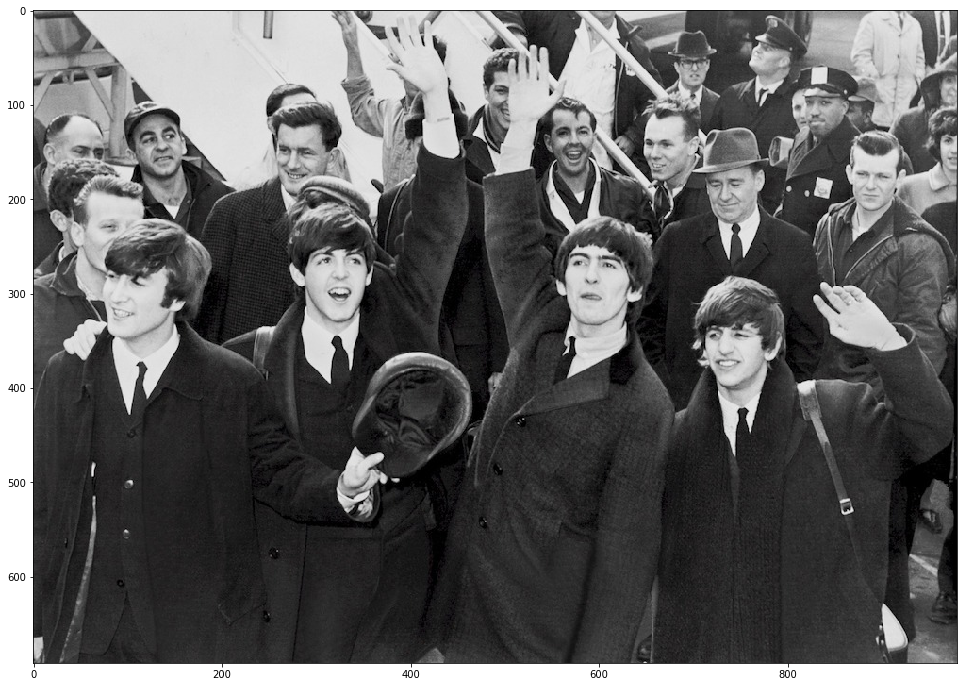

In [2]:
img = plt.imread(IMG_FILE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

In [3]:
%%time
IMG_FILE = "/Users/robincole/.homeassistant/images/thebeatles.jpg"
file = {
    'file': (IMG_FILE, open(IMG_FILE, 'rb')),
}

response = requests.post(URL, files=file).json()

CPU times: user 8.05 ms, sys: 5.04 ms, total: 13.1 ms
Wall time: 4.34 s


In [4]:
print_json(response)

{'faces': [{'confidence': 0,
            'matched': False,
            'rect': {'height': 52, 'left': 636, 'top': 124, 'width': 52}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 62, 'left': 246, 'top': 129, 'width': 62}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 52, 'left': 711, 'top': 164, 'width': 52}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 52, 'left': 106, 'top': 118, 'width': 52}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 43, 'left': 549, 'top': 118, 'width': 43}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 43, 'left': 866, 'top': 166, 'width': 43}},
           {'confidence': 0,
            'matched': False,
            'rect': {'height': 62, 'left': 563, 'top': 253, 'width': 63}},
           {'confidence': 0,
            'matched': False,
   

In [5]:
response['facesCount']

12

In [6]:
response['faces']

[{'confidence': 0,
  'matched': False,
  'rect': {'height': 52, 'left': 636, 'top': 124, 'width': 52}},
 {'confidence': 0,
  'matched': False,
  'rect': {'height': 62, 'left': 246, 'top': 129, 'width': 62}},
 {'confidence': 0,
  'matched': False,
  'rect': {'height': 52, 'left': 711, 'top': 164, 'width': 52}},
 {'confidence': 0,
  'matched': False,
  'rect': {'height': 52, 'left': 106, 'top': 118, 'width': 52}},
 {'confidence': 0,
  'matched': False,
  'rect': {'height': 43, 'left': 549, 'top': 118, 'width': 43}},
 {'confidence': 0,
  'matched': False,
  'rect': {'height': 43, 'left': 866, 'top': 166, 'width': 43}},
 {'confidence': 0,
  'matched': False,
  'rect': {'height': 62, 'left': 563, 'top': 253, 'width': 63}},
 {'confidence': 0,
  'matched': False,
  'rect': {'height': 74, 'left': 287, 'top': 246, 'width': 74}},
 {'confidence': 0,
  'matched': False,
  'rect': {'height': 75, 'left': 55, 'top': 204, 'width': 74}},
 {'confidence': 0.5812028911604818,
  'id': 'john.jpg',
  'matche

In [9]:
matched_faces = {face['name']: face['confidence'] for face in response['faces'] if face['matched']}
matched_faces

{'John Lennon': 0.5812028911604818}

# Bounding boxes - not required for HASS

In [31]:
def process_response(response):
    """Return the number of faces and identified faces."""
    total_faces = response['facesCount']
    face_data = response['faces']
    for face in response['faces']:
        bounding_boxes.append(face['rect'])
        if face['matched']:
            attr[face['name']] = round(face['confidence'], 2)
    return total_faces, attr, bounding_boxes

In [32]:
total_faces, attr, bounding_boxes = process_response(response)
print(total_faces)
attr

12


{'John Lennon': 0.58}

In [33]:
bounding_boxes

[{'height': 52, 'left': 636, 'top': 124, 'width': 52},
 {'height': 62, 'left': 246, 'top': 129, 'width': 62},
 {'height': 52, 'left': 711, 'top': 164, 'width': 52},
 {'height': 52, 'left': 106, 'top': 118, 'width': 52},
 {'height': 43, 'left': 549, 'top': 118, 'width': 43},
 {'height': 43, 'left': 866, 'top': 166, 'width': 43},
 {'height': 62, 'left': 563, 'top': 253, 'width': 63},
 {'height': 74, 'left': 287, 'top': 246, 'width': 74},
 {'height': 75, 'left': 55, 'top': 204, 'width': 74},
 {'height': 75, 'left': 63, 'top': 262, 'width': 74},
 {'height': 62, 'left': 709, 'top': 322, 'width': 62},
 {'height': 52, 'left': 803, 'top': 78, 'width': 52}]

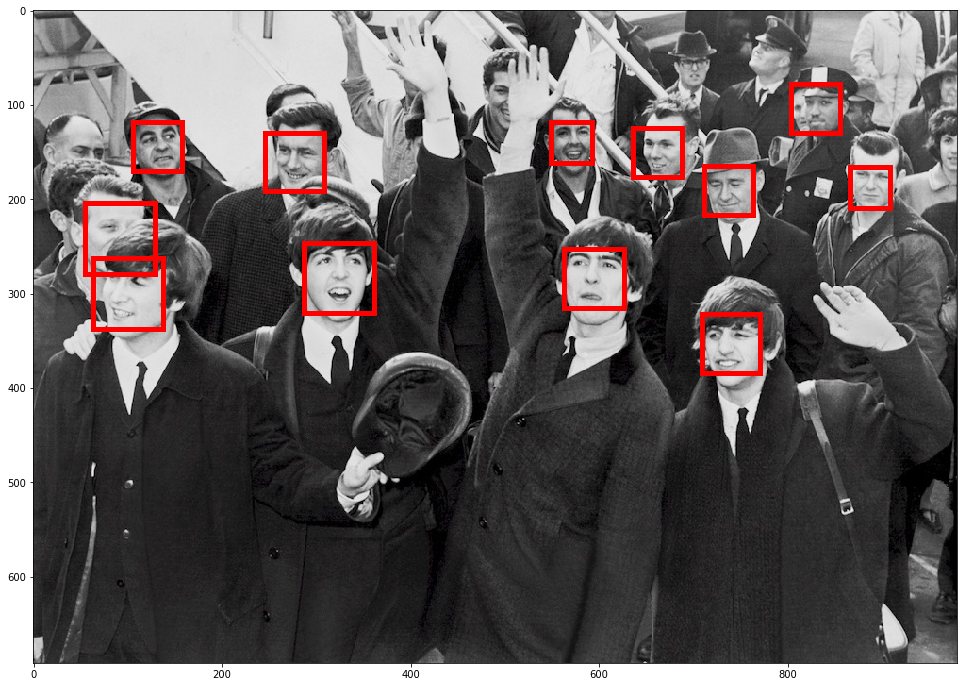

In [35]:
img = plt.imread(IMG_FILE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

for box in bounding_boxes:
    x = box['left']
    y = box['top']
    width = box['width']
    height = box['height']

    rect = patches.Rectangle((x,y), width, height, linewidth=5, edgecolor='r', facecolor='none')
    ax.add_patch(rect);

plt.savefig('facebox.png')

In [49]:
def save_boxes_image(img_file, bounding_boxes):
    """Take an image file and dict of bounding boxes and save the boxes on a copy of the image."""
    img = plt.imread(img_file)
    fig, ax = plt.subplots()
    ax.imshow(img);
    for box in bounding_boxes:
        x = box['left']
        y = box['top']
        width = box['width']
        height = box['height']

        rect = patches.Rectangle((x,y), width, height, linewidth=5, edgecolor='r', facecolor='none')
        ax.add_patch(rect);

    plt.savefig("boxed_image.png")

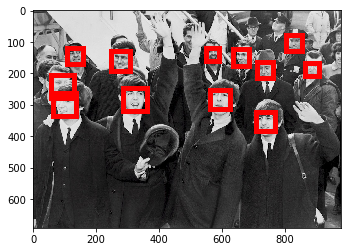

In [50]:
save_boxes_image(IMG_FILE, bounding_boxes)

In [46]:
?ax.images

## HA component